<a href="https://colab.research.google.com/github/bhargavpetla/News-category-detection-project/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import copy
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, linear_model, metrics
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
titles = []
categories = []
with open('/content/drive/MyDrive/Data/dsjVoxArticles.tsv','r') as tsv:
    count = 0;
    for line in tsv:
        a = line.strip().split('\t')[:3]
        if a[2] in ['Business & Finance', 'Health Care', 'Science & Health', 'Politics & Policy', 'Criminal Justice']:
            title = a[0].lower()
            title = re.sub('\s\W',' ',title)
            title = re.sub('\W\s',' ',title)
            titles.append(title)
            categories.append(a[2])

FileNotFoundError: ignored

In [ ]:
print("Titles-\n", "\n".join(titles[:5]))
print("\nCategories-\n", "\n".join(categories[:5]))

Titles-
 bitcoin is down 60 percent this year here's why i'm still optimistic.
9 charts that explain the history of global wealth
remember when legal marijuana was going to send crime skyrocketing?
obamacare succeeded for one simple reason it's horrible to be uninsured
the best obamacare data comes from a home office in michigan

Categories-
 Business & Finance
Business & Finance
Criminal Justice
Health Care
Health Care


In [ ]:
title_tr, title_te, category_tr, category_te = train_test_split(titles,categories)
title_tr, title_de, category_tr, category_de = train_test_split(title_tr,category_tr)
print("Training: ",len(title_tr))
print("Developement: ",len(title_de),)
print("Testing: ",len(title_te))

Training:  1779
Developement:  594
Testing:  792


In [ ]:
'''
from wordcloud import WordCloud
text = " ".join(title_tr)
wordcloud = WordCloud().generate(text)
plt.figure()
plt.subplots(figsize=(20,12))
wordcloud = WordCloud(
    background_color="white",
    max_words=len(text),
    max_font_size=40,
    relative_scaling=.5).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
'''

'\nfrom wordcloud import WordCloud\ntext = " ".join(title_tr)\nwordcloud = WordCloud().generate(text)\nplt.figure()\nplt.subplots(figsize=(20,12))\nwordcloud = WordCloud(\n    background_color="white",\n    max_words=len(text),\n    max_font_size=40,\n    relative_scaling=.5).generate(text)\nplt.imshow(wordcloud)\nplt.axis("off")\nplt.show()\n'

In [ ]:
tokenizer = nltk.tokenize.RegexpTokenizer(r"\w+")
stop_words = nltk.corpus.stopwords.words("english")
vectorizer = CountVectorizer(tokenizer=tokenizer.tokenize, stop_words=stop_words)

vectorizer.fit(iter(title_tr))
Xtr = vectorizer.transform(iter(title_tr))
Xde = vectorizer.transform(iter(title_de))
Xte = vectorizer.transform(iter(title_te))

encoder = LabelEncoder()
encoder.fit(category_tr)
Ytr = encoder.transform(category_tr)
Yde = encoder.transform(category_de)
Yte = encoder.transform(category_te)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [ ]:
reverse_vocabulary = {}
vocabulary = vectorizer.vocabulary_
for word in vocabulary:
    index = vocabulary[word]
    reverse_vocabulary[index] = word

vector = vectorizer.transform(iter(['Nasa scientists are good']))
indexes = vector.indices
for i in indexes:
    print (reverse_vocabulary[i])

good
nasa
scientists


In [ ]:
print("Number of features before reduction : ", Xtr.shape[1])
selection = VarianceThreshold(threshold=0.001)
Xtr_whole = copy.deepcopy(Xtr)
Ytr_whole = copy.deepcopy(Ytr)
selection.fit(Xtr)
Xtr = selection.transform(Xtr)
Xde = selection.transform(Xde)
Xte = selection.transform(Xte)
print("Number of features after reduction : ", Xtr.shape[1])

Number of features before reduction :  4303
Number of features after reduction :  1828


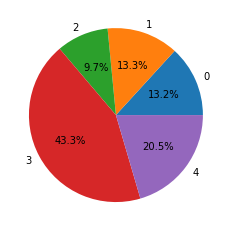

In [ ]:
labels = list(set(Ytr))
counts = []
for label in labels:
    counts.append(np.count_nonzero(Ytr == label))
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


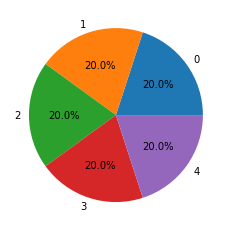

In [ ]:
sm = SMOTE(random_state=42)
Xtr, Ytr = sm.fit_sample(Xtr, Ytr)
labels = list(set(Ytr))
counts = []
for label in labels:
    counts.append(np.count_nonzero(Ytr == label))
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.show()

In [ ]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(Xtr, Ytr)
pred = rf.predict(Xde)
print(classification_report(Yde, pred, target_names=encoder.classes_))

                    precision    recall  f1-score   support

Business & Finance       0.39      0.47      0.42        81
  Criminal Justice       0.48      0.58      0.53        77
       Health Care       0.37      0.63      0.46        65
 Politics & Policy       0.75      0.57      0.65       265
  Science & Health       0.53      0.46      0.49       106

          accuracy                           0.54       594
         macro avg       0.50      0.54      0.51       594
      weighted avg       0.59      0.54      0.55       594



In [ ]:
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression()
Lr.fit(Xtr,Ytr)
pred = Lr.predict(Xde)
print(classification_report(Yde, pred, target_names=encoder.classes_))

                    precision    recall  f1-score   support

Business & Finance       0.47      0.68      0.55        81
  Criminal Justice       0.52      0.43      0.47        77
       Health Care       0.52      0.52      0.52        65
 Politics & Policy       0.74      0.67      0.70       265
  Science & Health       0.57      0.57      0.57       106

          accuracy                           0.61       594
         macro avg       0.56      0.57      0.56       594
      weighted avg       0.62      0.61      0.61       594



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
from sklearn import datasets, linear_model, metrics
reg = linear_model.LinearRegression()
reg.fit(Xtr,Ytr)
pred = reg.predict(Xde)

pred = (pred > 0.5)
   

pred
print(classification_report(Yde, pred, target_names=encoder.classes_))



                    precision    recall  f1-score   support

Business & Finance       0.18      0.42      0.25        81
  Criminal Justice       0.13      0.66      0.21        77
       Health Care       0.00      0.00      0.00        65
 Politics & Policy       0.00      0.00      0.00       265
  Science & Health       0.00      0.00      0.00       106

          accuracy                           0.14       594
         macro avg       0.06      0.22      0.09       594
      weighted avg       0.04      0.14      0.06       594



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state=1)

kmeans.fit(Xtr, Ytr)
pred = kmeans.predict(Xde)
print(classification_report(Yde, pred, target_names=encoder.classes_))


                    precision    recall  f1-score   support

Business & Finance       0.15      1.00      0.26        81
  Criminal Justice       0.14      0.01      0.02        77
       Health Care       0.51      0.32      0.40        65
 Politics & Policy       0.00      0.00      0.00       265
  Science & Health       0.00      0.00      0.00       106

          accuracy                           0.17       594
         macro avg       0.16      0.27      0.14       594
      weighted avg       0.09      0.17      0.08       594



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(Xtr, Ytr)
pred = svc.predict(Xde)
print(classification_report(Yde, pred, target_names=encoder.classes_))

                    precision    recall  f1-score   support

Business & Finance       0.40      0.28      0.33        81
  Criminal Justice       0.68      0.17      0.27        77
       Health Care       0.55      0.26      0.35        65
 Politics & Policy       0.54      0.90      0.68       265
  Science & Health       0.54      0.24      0.33       106

          accuracy                           0.53       594
         macro avg       0.54      0.37      0.39       594
      weighted avg       0.54      0.53      0.48       594



In [ ]:
mlp = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(100, 20), random_state=1, max_iter=400)
mlp.fit(Xtr, Ytr)
pred = mlp.predict(Xde)
print(classification_report(Yde, pred, target_names=encoder.classes_))

                    precision    recall  f1-score   support

Business & Finance       0.45      0.58      0.51        81
  Criminal Justice       0.55      0.42      0.47        77
       Health Care       0.47      0.48      0.47        65
 Politics & Policy       0.72      0.66      0.69       265
  Science & Health       0.51      0.58      0.54       106

          accuracy                           0.58       594
         macro avg       0.54      0.54      0.54       594
      weighted avg       0.59      0.58      0.59       594



In [ ]:
    import matplotlib.pyplot as plt
    from sklearn import model_selection
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from sklearn.naive_bayes import GaussianNB
    from sklearn.svm import SVC
    from sklearn.model_selection import train_test_split
    from sklearn import datasets
    import matplotlib.pyplot as plt

    plt.style.use('ggplot')

In [ ]:
seed = 50

In [ ]:
kfold = model_selection.KFold(n_splits=10, random_state=seed)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('SVM', SVC()))

In [ ]:
    results = []
    names = []
    scoring = 'accuracy'
    for name, model in models:
         kfold = model_selection.KFold(n_splits=10, random_state=seed)
         cv_results = model_selection.cross_val_score(model, Xtr, Ytr, cv=kfold, scoring=scoring)
         results.append(cv_results)
         names.append(name)
         msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
         print(msg)

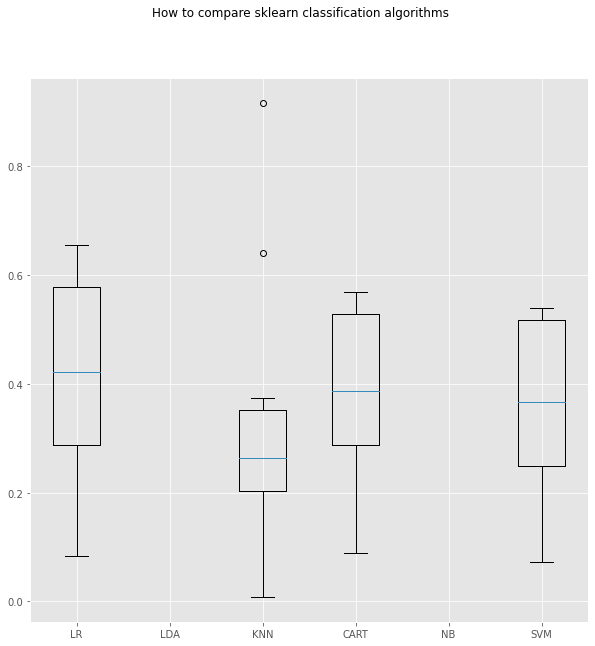

In [ ]:
    fig = plt.figure(figsize=(10,10))
    fig.suptitle('How to compare sklearn classification algorithms')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()